Task 2 :- User Engagement Analysis

In [1]:
# We will track the user’s engagement using the following engagement metrics: 
# sessions frequency 
# the duration of the session 
# the session total traffic (download and upload (bytes))

# Session Frequency: This can be calculated by counting the number of sessions per user. 
# We'll use a unique identifier for each user, such as 'MSISDN/Number'

# Import necesarry packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Calculating Session frequency for each user
df = pd.read_excel('Treated_df.xlsx')
session_frequency = df['MSISDN/Number'].value_counts().reset_index()
session_frequency.columns = ['MSISDN/Number', 'session_frequency']

# Displaying the first few rows to check the session frequency calculation
session_frequency.head()

,MSISDN/Number,session_frequency
0,3.365762e+10,24742
1,3.362632e+10,18
2,3.362578e+10,17
3,3.361489e+10,17
4,3.365973e+10,16


In [2]:
# The duration of the session

# Calculating the average session duration and total traffic for each user
user_data = df.groupby('MSISDN/Number').agg(
    Average_Session_Duration_ms = ('Dur. (ms)', 'mean'),
    Total_Upload_Bytes = ('Total UL (Bytes)', 'sum'),
    Total_Download_Bytes = ('Total DL (Bytes)', 'sum')
).reset_index()

# Calculating total traffic (Upload + Download)
user_data['Total_Traffic_Bytes'] = user_data['Total_Upload_Bytes'] + user_data['Total_Download_Bytes']

user_data.head()

,MSISDN/Number,Average_Session_Duration_ms,Total_Upload_Bytes,Total_Download_Bytes,Total_Traffic_Bytes
0,3.360171e+10,38503.0,46211970.0,2.934050e+08,3.396170e+08
1,3.360171e+10,52478.0,38509721.0,8.621012e+08,9.006109e+08
2,3.360171e+10,60149.0,89299844.0,1.498037e+09,1.587337e+09
3,3.360171e+10,176022.0,44946263.0,1.333844e+08,1.783307e+08
4,3.360172e+10,127918.0,28593661.0,3.060978e+08,3.346914e+08


Observations :- These metrics together provide a multi-dimensional view of user engagement. Users with high session frequency, longer average session durations, and higher total traffic are generally more engaged. They are using the service frequently, spending more time per session, and consuming more data overall.

In [3]:
# Aggregating the above metrics per customer id (MSISDN)

# Merging the session frequency data with the user data
user_engagement = pd.merge(user_data, session_frequency, on='MSISDN/Number')

# Sorting and selecting the top 10 users based on each engagement metric
top_10_session_frequency = user_engagement.sort_values('session_frequency', ascending=False).head(10)
top_10_average_duration = user_engagement.sort_values('Average_Session_Duration_ms', ascending=False).head(10)
top_10_total_traffic = user_engagement.sort_values('Total_Traffic_Bytes', ascending=False).head(10)

top_10_session_frequency, top_10_average_duration, top_10_total_traffic

(       MSISDN/Number  Average_Session_Duration_ms  Total_Upload_Bytes  \
 28671   3.365762e+10                 92228.779137        1.017757e+12   
 13261   3.362632e+10                103749.451366        6.696507e+08   
 6172    3.361489e+10                103556.948505        6.894830e+08   
 12915   3.362578e+10                 99579.268880        7.295774e+08   
 36788   3.365973e+10                122756.264490        6.242603e+08   
 76099   3.367588e+10                120250.215456        5.815688e+08   
 64854   3.366716e+10                 98465.359863        5.663264e+08   
 1014    3.360452e+10                104304.602654        3.917759e+08   
 401     3.360313e+10                 97851.704586        4.355876e+08   
 13729   3.362708e+10                104496.852654        4.452519e+08   
 
        Total_Download_Bytes  Total_Traffic_Bytes  session_frequency  
 28671          1.118994e+13         1.220769e+13              24742  
 13261          7.301517e+09         7.971

In [4]:
# Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement

# Import necessary packages
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting the relevant columns for clustering
clustering_data = user_engagement[['session_frequency', 'Average_Session_Duration_ms', 'Total_Traffic_Bytes']]

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Running k-means clustering with k=3
KMeans = KMeans(n_clusters=3, random_state=42)
KMeans.fit(normalized_data)

# Adding the cluster labels to the dataframe
user_engagement['Cluster'] = KMeans.labels_

user_engagement.head()

,MSISDN/Number,Average_Session_Duration_ms,Total_Upload_Bytes,Total_Download_Bytes,Total_Traffic_Bytes,session_frequency,Cluster
0,3.360171e+10,38503.0,46211970.0,2.934050e+08,3.396170e+08,1,1
1,3.360171e+10,52478.0,38509721.0,8.621012e+08,9.006109e+08,1,1
2,3.360171e+10,60149.0,89299844.0,1.498037e+09,1.587337e+09,2,1
3,3.360171e+10,176022.0,44946263.0,1.333844e+08,1.783307e+08,1,0
4,3.360172e+10,127918.0,28593661.0,3.060978e+08,3.346914e+08,1,0


In [5]:
user_engagement.to_excel('user_engagement.xlsx')

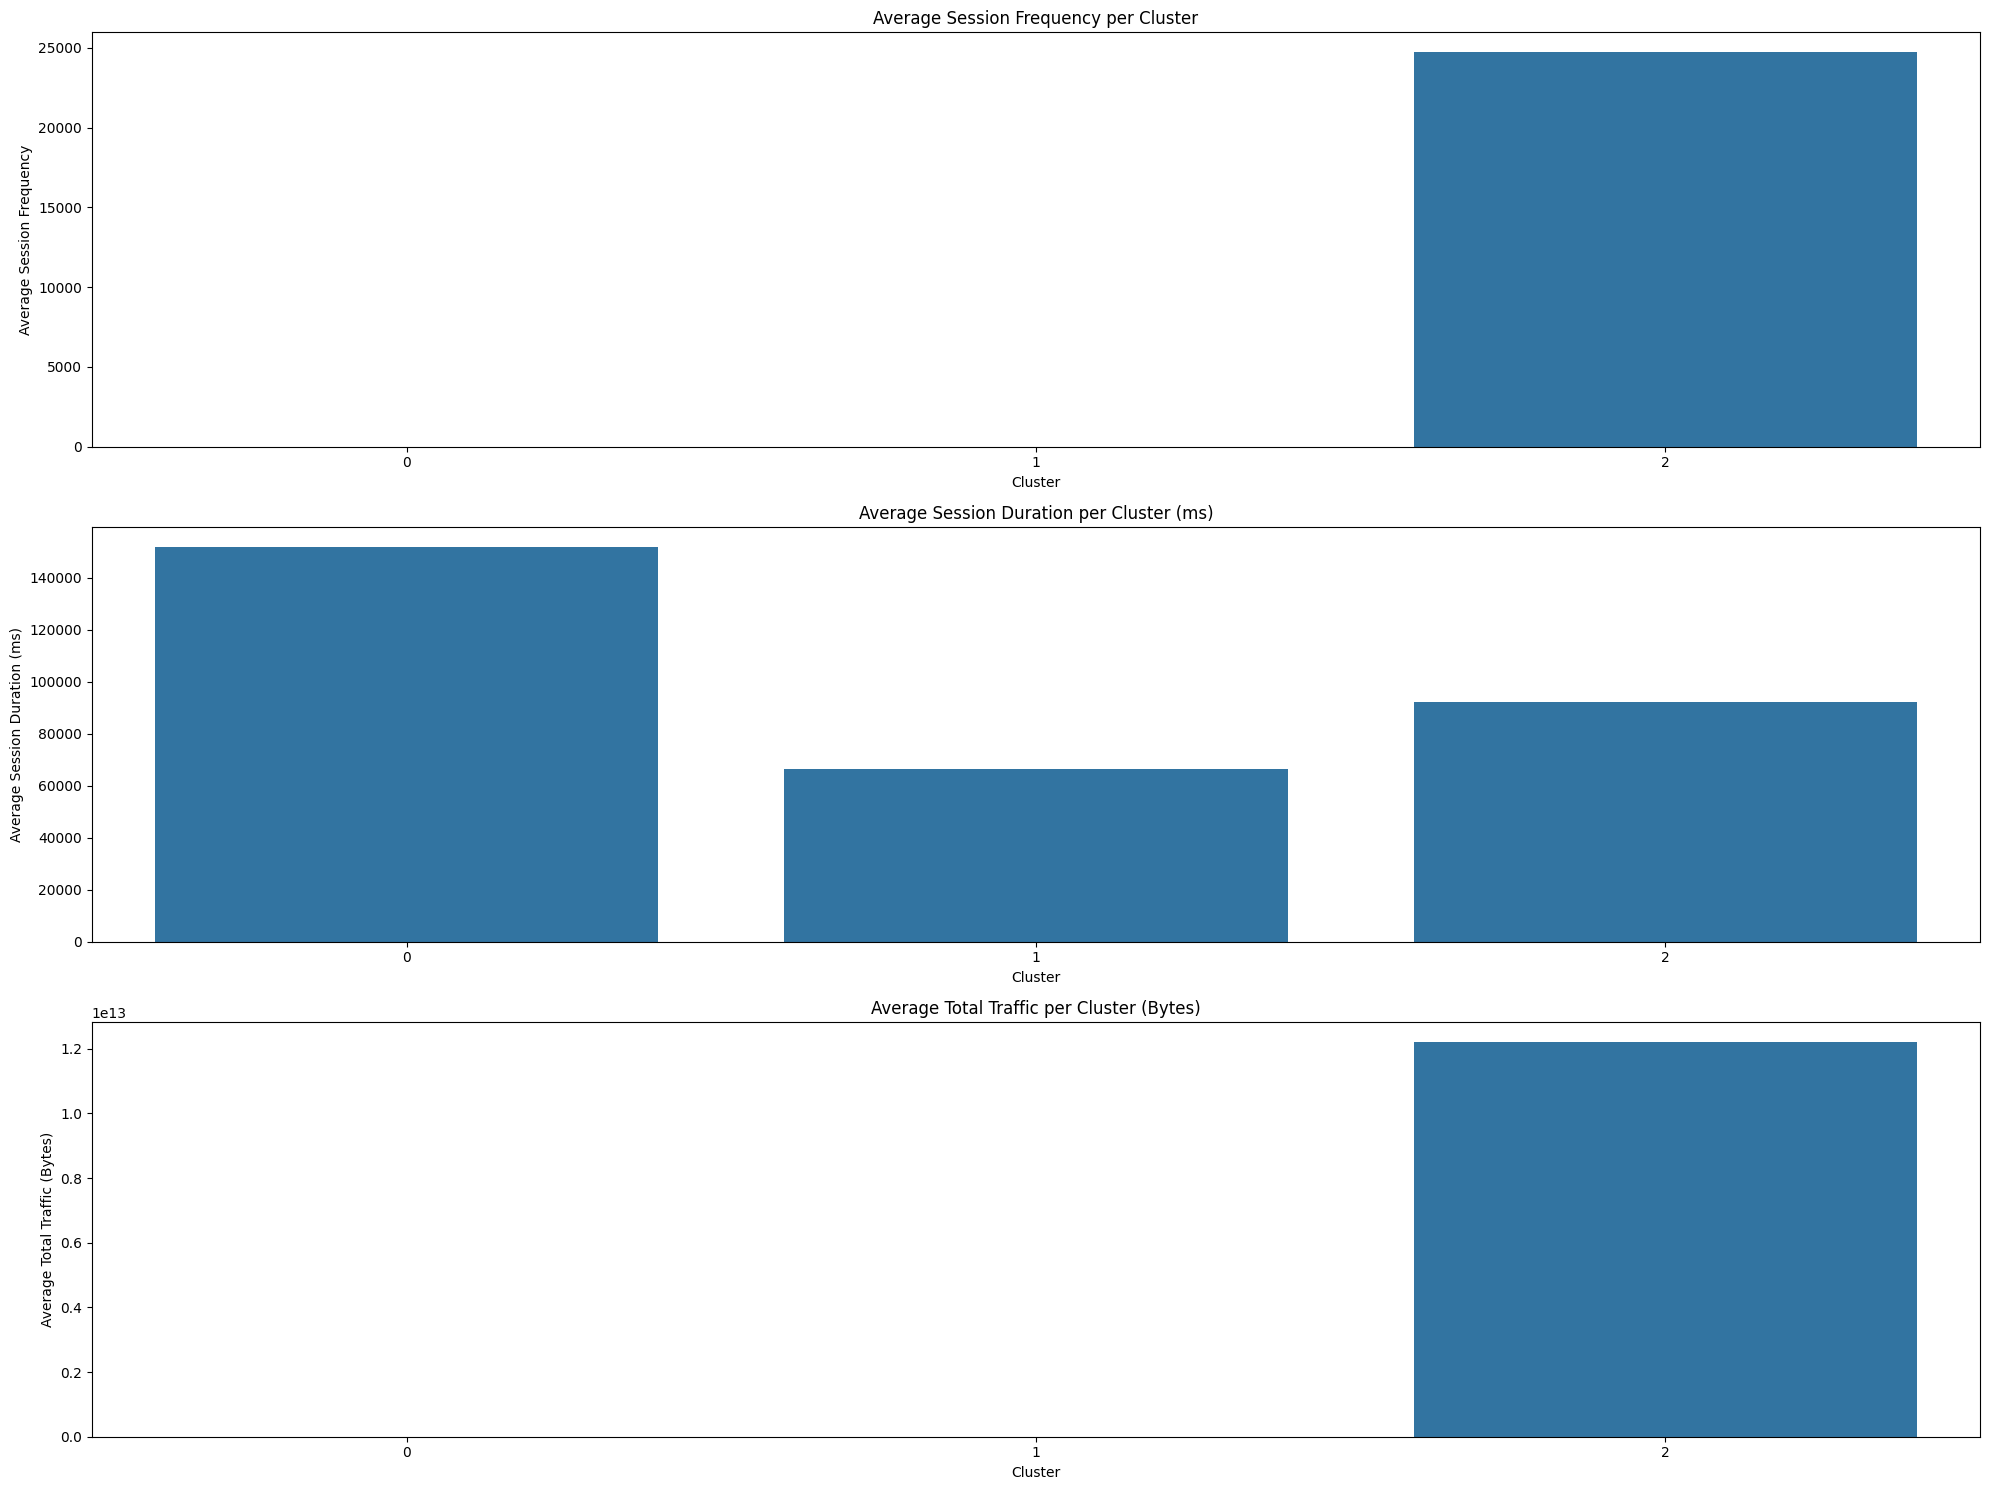

,Cluster,Min_Session_Frequency,Max_Session_Frequency,Average_Session_Frequency,Total_Session_Frequency,Min_Average_Session_Duration,Max_Average_Session_Duration,Average_Session_Duration,Total_Session_Duration,Min_Total_Traffic,Max_Total_Traffic,Average_Total_Traffic,Total_Traffic
0,0,1,16,1.373268,37552,109200.000000,244900.000000,151758.515234,4.149837e+09,3.357584e+07,7.891111e+09,6.817341e+08,1.864202e+13
1,1,1,18,1.399037,87707,7146.000000,109196.000000,66483.802551,4.167936e+09,3.324901e+07,8.846226e+09,6.941228e+08,4.351525e+13
2,2,24742,24742,24742.000000,24742,92228.779137,92228.779137,92228.779137,9.222878e+04,1.220769e+13,1.220769e+13,1.220769e+13,1.220769e+13


In [6]:
# Calculating the minimum, maximum, average, and total for each metric within each cluster
cluster_summary = user_engagement.groupby('Cluster').agg(
    Min_Session_Frequency=('session_frequency', 'min'),
    Max_Session_Frequency=('session_frequency', 'max'),
    Average_Session_Frequency=('session_frequency', 'mean'),
    Total_Session_Frequency=('session_frequency', 'sum'),
    Min_Average_Session_Duration=('Average_Session_Duration_ms', 'min'),
    Max_Average_Session_Duration=('Average_Session_Duration_ms', 'max'),
    Average_Session_Duration=('Average_Session_Duration_ms', 'mean'),
    Total_Session_Duration=('Average_Session_Duration_ms', 'sum'),
    Min_Total_Traffic=('Total_Traffic_Bytes', 'min'),
    Max_Total_Traffic=('Total_Traffic_Bytes', 'max'),
    Average_Total_Traffic=('Total_Traffic_Bytes', 'mean'),
    Total_Traffic=('Total_Traffic_Bytes', 'sum')
).reset_index()

# Plotting the results for better visualization and interpretation
plt.figure(figsize=(20, 15))

# Session Frequency
plt.subplot(3, 1, 1)
sns.barplot(x='Cluster', y='Average_Session_Frequency', data=cluster_summary)
plt.title('Average Session Frequency per Cluster')
plt.ylabel('Average Session Frequency')

# Average Session Duration
plt.subplot(3, 1, 2)
sns.barplot(x='Cluster', y='Average_Session_Duration', data=cluster_summary)
plt.title('Average Session Duration per Cluster (ms)')
plt.ylabel('Average Session Duration (ms)')

# Total Traffic
plt.subplot(3, 1, 3)
sns.barplot(x='Cluster', y='Average_Total_Traffic', data=cluster_summary)
plt.title('Average Total Traffic per Cluster (Bytes)')
plt.ylabel('Average Total Traffic (Bytes)')

plt.tight_layout()
plt.show()

cluster_summary

Session Frequency: Cluster 2 stands out with a significantly higher session frequency than Clusters 0 and 1. 

Average Session Duration: Cluster 0 has the longest average session duration, indicating that while these users may not have many sessions, they tend to be lengthier. 

Total Traffic: Cluster 2 users consume significantly more data, aligning with their higher session frequency and duration. 

Overall, these clusters help in understanding different user behaviors: low-engagement users (Cluster 1), high-engagement users (Cluster 2), and users who may engage less frequently but for longer durations (Cluster 0).

In [7]:
# Aggregating total traffic per application (download + upload) for each user
apps_traffic = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
app_traffic_per_user = pd.DataFrame(index=df['MSISDN/Number'].unique())

for app in apps_traffic:
    dl_column = f'{app} DL (Bytes)'
    ul_column = f'{app} UL (Bytes)'
    app_traffic_per_user[app] = df.groupby('MSISDN/Number')[dl_column].sum() + df.groupby('MSISDN/Number')[ul_column].sum()

# Finding the top 10 most engaged users per application
top_10_users_per_app = {app: app_traffic_per_user[app].nlargest(10).index.tolist() for app in apps_traffic}

top_10_users_per_app

{'Social Media': [33657618346.57521,
  33626320676.0,
  33659725664.0,
  33614892860.0,
  33625779332.0,
  33667163239.0,
  33669068942.0,
  33603127838.0,
  33658490784.0,
  33665530316.0],
 'Google': [33657618346.57521,
  33626320676.0,
  33625779332.0,
  33614892860.0,
  33659725664.0,
  33675877202.0,
  33667163239.0,
  33698756430.0,
  33659359429.0,
  33699000433.0],
 'Email': [33657618346.57521,
  33626320676.0,
  33614892860.0,
  33625779332.0,
  33659725664.0,
  33675877202.0,
  33665460546.0,
  33667163239.0,
  33698792269.0,
  33698756430.0],
 'Youtube': [33657618346.57521,
  33625779332.0,
  33614892860.0,
  33626320676.0,
  33675877202.0,
  33667163239.0,
  33627080969.0,
  33698792269.0,
  33603127838.0,
  33664712899.0],
 'Netflix': [33657618346.57521,
  33659725664.0,
  33614892860.0,
  33625779332.0,
  33626320676.0,
  33667163239.0,
  33675877202.0,
  33698756430.0,
  33698792269.0,
  33627080969.0],
 'Gaming': [33657618346.57521,
  33614892860.0,
  33625779332.0,
  3

It's notable that some users, such as 33657618346.57521, appear as top users across multiple applications, indicating their high overall engagement with various services.

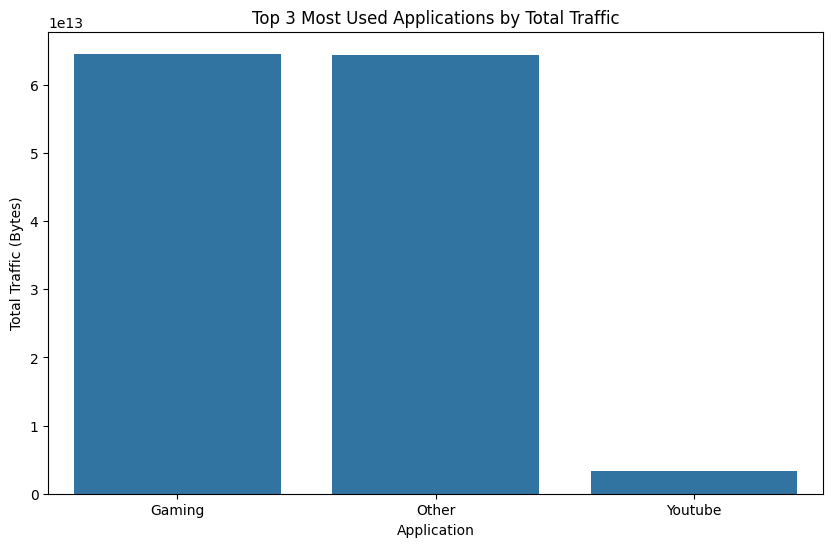

In [8]:
# Calculating the total traffic per application across all users
total_traffic_per_app = app_traffic_per_user.sum()

# Sorting the total traffic to find the top 3 most used applications
top_3_apps = total_traffic_per_app.sort_values(ascending=False).head(3)

# Plotting the top 3 most used applications
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_apps.index, y=top_3_apps.values)
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Application')
plt.show()

The bar chart displays the top 3 most used applications by total traffic across all users:

Gaming: This application category shows the highest total traffic, indicating that it is the most used application among the users in terms of data consumption.

Other: The 'Other' category, which likely includes various miscellaneous applications and services, ranks second in terms of total traffic.

Youtube: Youtube is the third most used application, suggesting a significant amount of data usage for streaming video content.

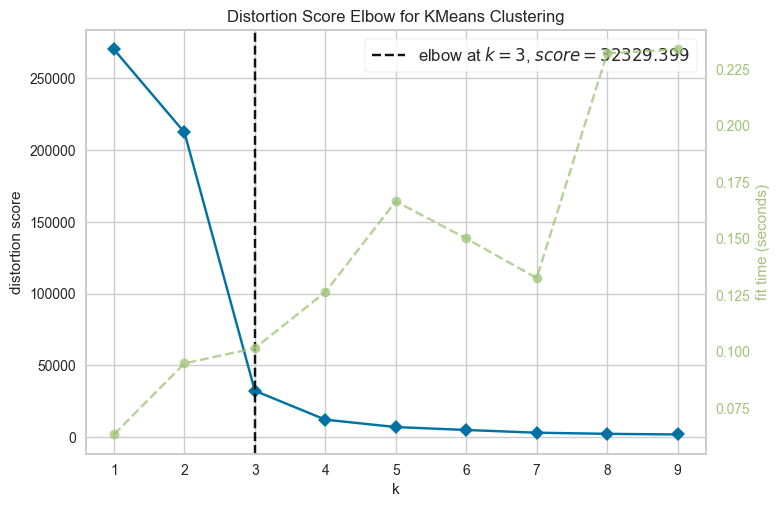

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Grouping users in k engagement clusters based on the engagement metrics

# Import necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Using the normalized engagement metrics for clustering
X = normalized_data

# Initializing KMeans and using the Elbow Method to find the optimal number of clusters (k)
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.show()


Interpretation :- The elbow is at k = 3, where the score is approximately 32329.399. This is the point after which the decrease in the distortion score slows down, suggesting that k =3 is the optimized number of clusters according to the elbow method.